In [1]:
import nltk

In [2]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
import textblob
import os 
import nltk.corpus
import pandas as pd
import numpy as np
import seaborn as sns
import re
from textblob import TextBlob

import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import norm, skew

In [4]:
data = pd.read_csv("dataID.csv",sep=",",encoding='Latin-1')

In [5]:
data.head()

Id    App_Name  Star_rating  Helpful  \
0   1  AliExpress          3.0      1.0   
1   2  AliExpress          3.0      1.0   
2   3  AliExpress          1.0      1.0   
3   4  AliExpress          2.0      1.0   
4   5  AliExpress          1.0      1.0   

                                            Comments  
0  The first thing you'll notice is prices shown ...  
1  it's alright, but sometimes items get moved to...  
2  Too much gay sex stuff. I'm looking for differ...  
3  No longer able to use AliExpress to purchase i...  
4  Although functionally better than the total di...

In [6]:
data.shape

(20111, 5)

In [7]:
sentence_list = []
full_text = ""
for i in range(len(data["Comments"])):
    sentence_list.append(data["Comments"][i])
    full_text += str(data["Comments"][i]) + " "

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20111 entries, 0 to 20110
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           20111 non-null  int64  
 1   App_Name     20110 non-null  object 
 2   Star_rating  20109 non-null  float64
 3   Helpful      20110 non-null  float64
 4   Comments     20109 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 785.7+ KB


In [9]:
data.describe().T

count          mean          std  min     25%      50%  \
Id           20111.0  10056.000000  5805.689968  1.0  5028.5  10056.0   
Star_rating  20109.0      2.448158     1.495155  1.0     1.0      2.0   
Helpful      20110.0    178.495674  1687.026329  0.0     2.0     10.0   

                 75%       max  
Id           15083.5   20111.0  
Star_rating      4.0       5.0  
Helpful         66.0  117577.0

In [10]:
data["Star_rating"].unique()

array([ 3.,  1.,  2.,  4.,  5., nan])

In [11]:
data["Helpful"].unique()

array([  1.,  10., 102., ..., 899., 920., 988.])

In [12]:
data["App_Name"].unique()

array(['AliExpress', 'Amazon Prime Video', nan,
       'BiP - Messenger, Video Call', 'BURGER KINGÂ® App',
       'Discord - Chat, Talk & Hangout', 'Disney+', "Domino's Pizza USA",
       'eBay: The shopping marketplace', 'Facebook',
       'Foursquare Swarm: Check In', 'Gmail', 'Google Duo', 'HangOut',
       'HBO Max: Stream TV & Movies', 'Hulu: Watch TV shows & movies',
       'Instagram', 'LINE: Calls & Messages',
       'LinkedIn: Jobs & Business News', "McDonald's", 'Messenger',
       'Netflix', 'Nike', 'Nimo TV - Live Game Streaming',
       'NVIDIA GeForce NOW', 'Pinterest', 'Pluto TV - Live TV and Movies',
       'Reddit', 'Signal Private Messenger', 'Skype', 'Snapchat',
       'Spotify: Music and Podcasts', 'Starbucks', 'Steam',
       'Tango-Live Stream & Video Chat', 'Telegram',
       'TextNow: Call + Text Unlimited', 'TikTok',
       'Tinder - Dating & Make Friends', 'Tubi - Movies & TV Shows',
       'Twitch: Live Game Streaming', 'Twitter', 'Uber - Request a ride',
   

In [13]:
data["Star_rating"].value_counts()

1.0    8207
2.0    3345
5.0    3120
3.0    3015
4.0    2422
Name: Star_rating, dtype: int64

In [14]:
data["Helpful"].value_counts()

0.0        2618
1.0        2023
2.0        1299
3.0         972
4.0         746
           ... 
584.0         1
813.0         1
10148.0       1
1033.0        1
988.0         1
Name: Helpful, Length: 1238, dtype: int64

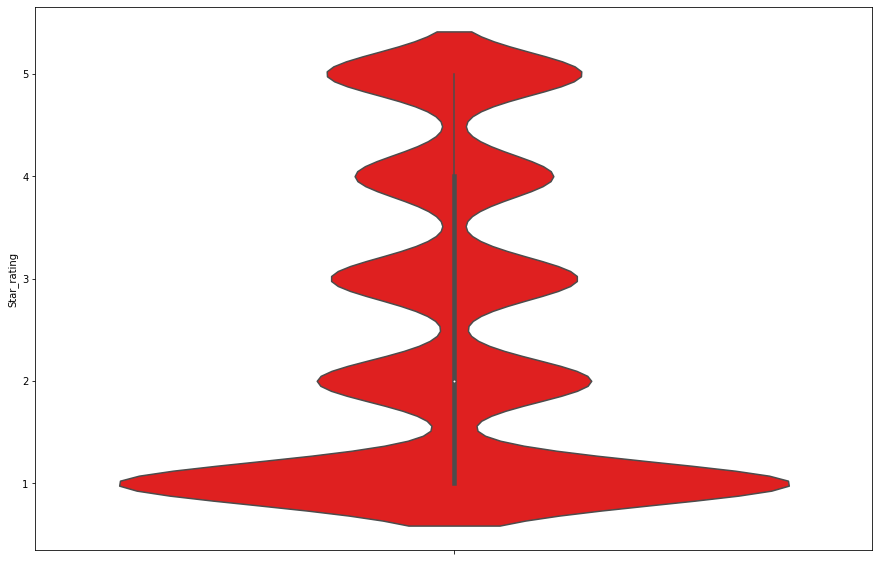

In [15]:
plt.figure(figsize=(15,10))
fig=sns.violinplot(y=data["Star_rating"], color = "red")
plt.show(fig)

D:\phython\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


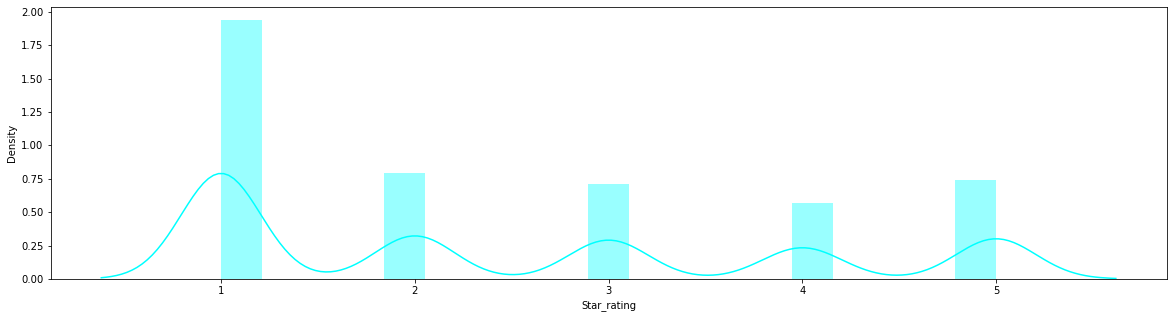

In [16]:
plt.figure(figsize=(20,5))
fig = sns.distplot(data["Star_rating"], bins = "auto", color = "cyan")
plt.show(fig)

In [17]:
data.dropna()

Id    App_Name  Star_rating  Helpful  \
0          1  AliExpress          3.0      1.0   
1          2  AliExpress          3.0      1.0   
2          3  AliExpress          1.0      1.0   
3          4  AliExpress          2.0      1.0   
4          5  AliExpress          1.0      1.0   
...      ...         ...          ...      ...   
20106  20107     YouTube          1.0     95.0   
20107  20108     YouTube          1.0    961.0   
20108  20109     YouTube          1.0    961.0   
20109  20110     YouTube          2.0    976.0   
20110  20111     YouTube          1.0    988.0   

                                                Comments  
0      The first thing you'll notice is prices shown ...  
1      it's alright, but sometimes items get moved to...  
2      Too much gay sex stuff. I'm looking for differ...  
3      No longer able to use AliExpress to purchase i...  
4      Although functionally better than the total di...  
...                                                  ...  
20106  Something very wrong is happening to such a gr...  
20107  There are very basic user interface issues tha...  
20108  They keep adding more commercials. Every video...  
20109  I was able to press the home button app and it...  
20110  Im thinking that none of the programers actual...  

[20109 rows x 5 columns]

In [18]:
data.groupby(["App_Name"])["Helpful"].mean()

App_Name
AliExpress                          33.528000
Amazon Prime Video                  92.679537
BURGER KINGÂ® App                   25.944272
BiP - Messenger, Video Call        122.112186
Discord - Chat, Talk & Hangout      56.886538
Disney+                             48.776000
Domino's Pizza USA                   4.855131
Facebook                           131.498000
Foursquare Swarm: Check In          12.227533
Gmail                              103.306533
Google Duo                          56.819639
HBO Max: Stream TV & Movies         39.122736
HangOut                             10.875000
Hulu: Watch TV shows & movies       37.747495
Instagram                          172.922222
LINE: Calls & Messages              83.868979
LinkedIn: Jobs & Business News      62.379032
McDonald's                          43.959677
Messenger                          141.090253
NVIDIA GeForce NOW                  13.951220
Netflix                            204.047393
Nike                     

In [19]:
data.groupby(["App_Name"])["Star_rating"].mean()

App_Name
AliExpress                        2.924000
Amazon Prime Video                2.436293
BURGER KINGÂ® App                 1.820433
BiP - Messenger, Video Call       3.594961
Discord - Chat, Talk & Hangout    3.278846
Disney+                           1.918000
Domino's Pizza USA                3.169014
Facebook                          1.502000
Foursquare Swarm: Check In        2.332696
Gmail                             1.793970
Google Duo                        3.064128
HBO Max: Stream TV & Movies       1.746479
HangOut                           3.639706
Hulu: Watch TV shows & movies     2.026052
Instagram                         1.802778
LINE: Calls & Messages            1.759152
LinkedIn: Jobs & Business News    2.562500
McDonald's                        2.074597
Messenger                         2.014440
NVIDIA GeForce NOW                3.143293
Netflix                           2.338863
Nike                              2.882236
Nimo TV - Live Game Streaming     2.407480
Pi

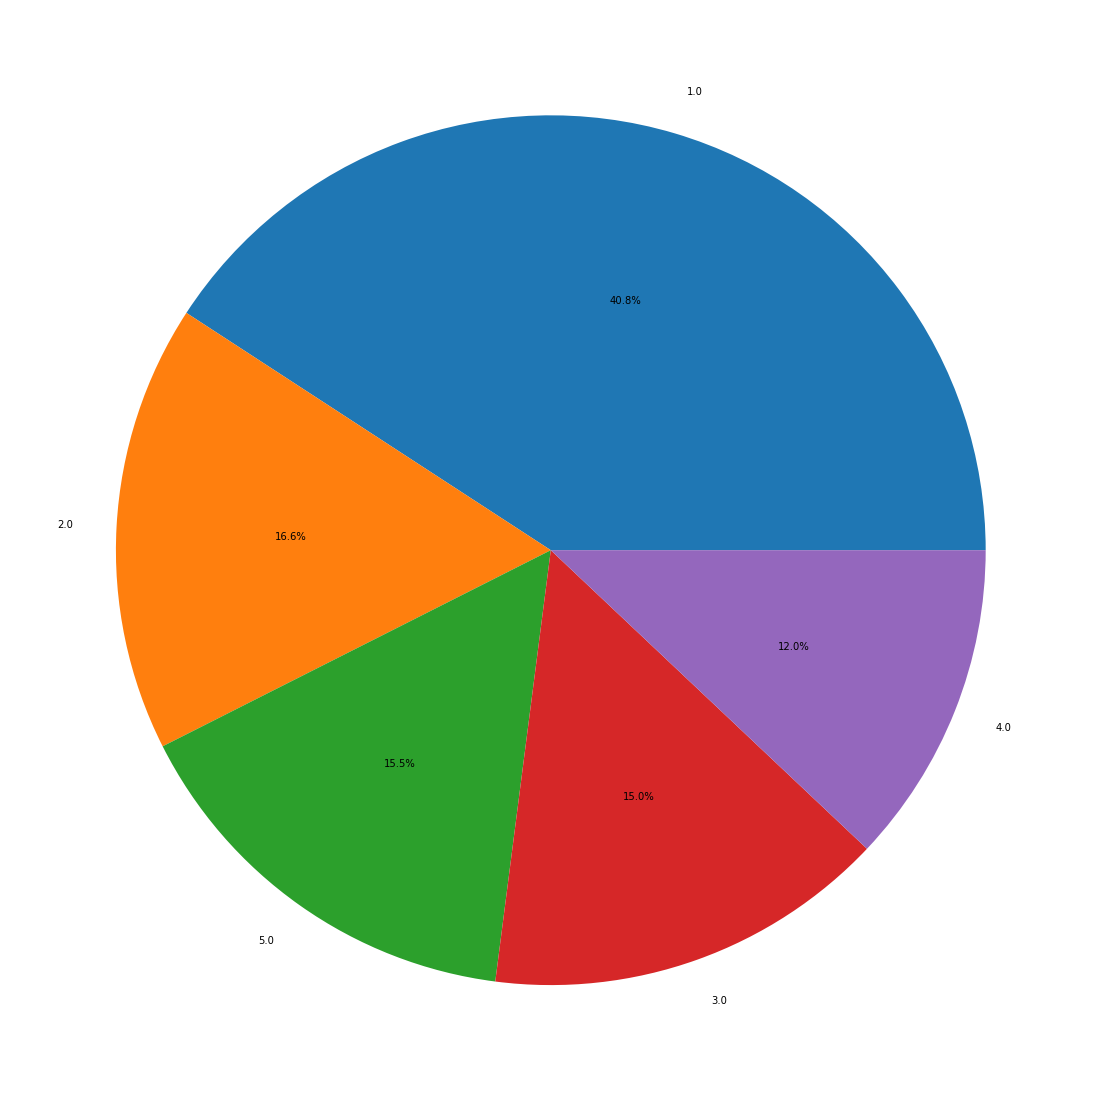

In [20]:
fig1,ax1 = plt.subplots(figsize = (20,20))
mylabels = data["Star_rating"].value_counts().index
ax1.pie(data["Star_rating"].value_counts(), labels=mylabels, autopct= '%1.1f%%')
plt.show()

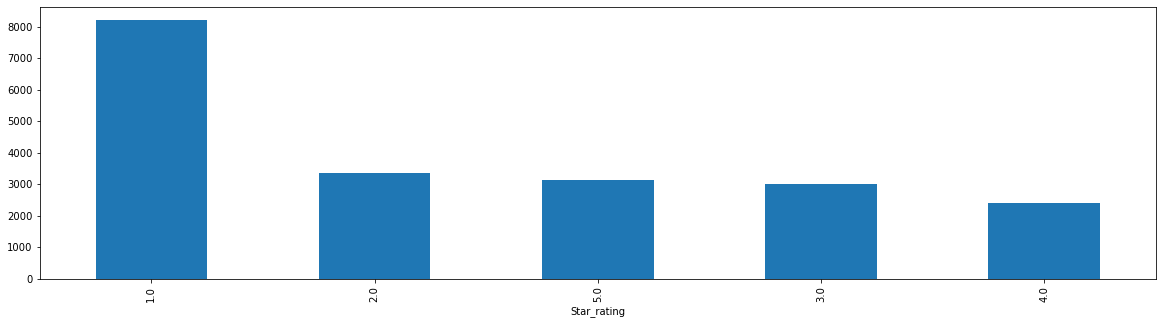

In [26]:
plt.figure(figsize=(20,5))
fig = data.groupby(["Star_rating"])["App_Name"].count().sort_values(ascending = False).head(15).plot(kind = "bar")
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
plt.show(fig)

In [23]:
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # Removed @mentions
    text = re.sub(r'#', '', text) # Removing the '#' symbol
    text = re.sub(r'RT[\s]+', '', text) # Removing RT
    text = re.sub(r'https?:\/\/\S+', '', text) # Remove the hyper link
    text = re.sub(r':', '', text)
    text = re.sub(r'\?', '', text)
    text = re.sub(r'^\s*', '', text)
    text = re.sub("[^a-zA-Z0-9\s]+", "",text)
    text = re.sub(r'[^\w\s]', '', text)
    
    return text

def cleanLines():
    for i in range(len(data)):
        full_text = full_text.replace("\n"," ")
        

cleanTxt(full_text)

'The first thing youll notice is prices shown are not for the items shown this is done by offering many items under a single post First time uses will be confused and end up with only partially correct items or even something not related at all Confirmation of orders shows tiny pix of items that need to be larger clicking on pix just shows page with multiple items with no item  No simple list of orders confusing pages that take you away confirming wrong item removes it from view completly its alright but sometimes items get moved to the received section even tho I havent confirmed receiving them nor received them the delivery status is also faked sometimes depending on the day it gives me a different date of something that according to the site has already happened The deliveries take longer and longer the tracking doesnt work properly The app tells me that the delivery company has the order but after checking the companys site it turns out thats not the truth Too much gay sex stuff Im

In [27]:
from nltk.tokenize import word_tokenize
Google_tokens = word_tokenize(cleanTxt(full_text))
Google_tokens

['The',
 'first',
 'thing',
 'youll',
 'notice',
 'is',
 'prices',
 'shown',
 'are',
 'not',
 'for',
 'the',
 'items',
 'shown',
 'this',
 'is',
 'done',
 'by',
 'offering',
 'many',
 'items',
 'under',
 'a',
 'single',
 'post',
 'First',
 'time',
 'uses',
 'will',
 'be',
 'confused',
 'and',
 'end',
 'up',
 'with',
 'only',
 'partially',
 'correct',
 'items',
 'or',
 'even',
 'something',
 'not',
 'related',
 'at',
 'all',
 'Confirmation',
 'of',
 'orders',
 'shows',
 'tiny',
 'pix',
 'of',
 'items',
 'that',
 'need',
 'to',
 'be',
 'larger',
 'clicking',
 'on',
 'pix',
 'just',
 'shows',
 'page',
 'with',
 'multiple',
 'items',
 'with',
 'no',
 'item',
 'No',
 'simple',
 'list',
 'of',
 'orders',
 'confusing',
 'pages',
 'that',
 'take',
 'you',
 'away',
 'confirming',
 'wrong',
 'item',
 'removes',
 'it',
 'from',
 'view',
 'completly',
 'its',
 'alright',
 'but',
 'sometimes',
 'items',
 'get',
 'moved',
 'to',
 'the',
 'received',
 'section',
 'even',
 'tho',
 'I',
 'havent',
 'co

In [28]:
len(Google_tokens)

1263457

In [29]:
from nltk.probability import FreqDist
fdist = FreqDist()

In [30]:
for words in Google_tokens:
    fdist[words.lower()] +=1
fdist  

FreqDist({'the': 55486, 'to': 43856, 'i': 38797, 'and': 33534, 'it': 28957, 'a': 24990, 'app': 21453, 'is': 19071, 'of': 14861, 'my': 14060, ...})

In [31]:
len(fdist) #unique words

23051

In [32]:
fdist_top10 = fdist.most_common(10)
fdist_top10

[('the', 55486),
 ('to', 43856),
 ('i', 38797),
 ('and', 33534),
 ('it', 28957),
 ('a', 24990),
 ('app', 21453),
 ('is', 19071),
 ('of', 14861),
 ('my', 14060)]

In [33]:
from nltk.util import bigrams, trigrams, ngrams

In [34]:
Google_bigrams = list(nltk.bigrams(Google_tokens))
Google_bigrams

[('The', 'first'),
 ('first', 'thing'),
 ('thing', 'youll'),
 ('youll', 'notice'),
 ('notice', 'is'),
 ('is', 'prices'),
 ('prices', 'shown'),
 ('shown', 'are'),
 ('are', 'not'),
 ('not', 'for'),
 ('for', 'the'),
 ('the', 'items'),
 ('items', 'shown'),
 ('shown', 'this'),
 ('this', 'is'),
 ('is', 'done'),
 ('done', 'by'),
 ('by', 'offering'),
 ('offering', 'many'),
 ('many', 'items'),
 ('items', 'under'),
 ('under', 'a'),
 ('a', 'single'),
 ('single', 'post'),
 ('post', 'First'),
 ('First', 'time'),
 ('time', 'uses'),
 ('uses', 'will'),
 ('will', 'be'),
 ('be', 'confused'),
 ('confused', 'and'),
 ('and', 'end'),
 ('end', 'up'),
 ('up', 'with'),
 ('with', 'only'),
 ('only', 'partially'),
 ('partially', 'correct'),
 ('correct', 'items'),
 ('items', 'or'),
 ('or', 'even'),
 ('even', 'something'),
 ('something', 'not'),
 ('not', 'related'),
 ('related', 'at'),
 ('at', 'all'),
 ('all', 'Confirmation'),
 ('Confirmation', 'of'),
 ('of', 'orders'),
 ('orders', 'shows'),
 ('shows', 'tiny'),
 ('

In [35]:
Google_trigrams = list(nltk.trigrams(Google_tokens))
Google_trigrams

[('The', 'first', 'thing'),
 ('first', 'thing', 'youll'),
 ('thing', 'youll', 'notice'),
 ('youll', 'notice', 'is'),
 ('notice', 'is', 'prices'),
 ('is', 'prices', 'shown'),
 ('prices', 'shown', 'are'),
 ('shown', 'are', 'not'),
 ('are', 'not', 'for'),
 ('not', 'for', 'the'),
 ('for', 'the', 'items'),
 ('the', 'items', 'shown'),
 ('items', 'shown', 'this'),
 ('shown', 'this', 'is'),
 ('this', 'is', 'done'),
 ('is', 'done', 'by'),
 ('done', 'by', 'offering'),
 ('by', 'offering', 'many'),
 ('offering', 'many', 'items'),
 ('many', 'items', 'under'),
 ('items', 'under', 'a'),
 ('under', 'a', 'single'),
 ('a', 'single', 'post'),
 ('single', 'post', 'First'),
 ('post', 'First', 'time'),
 ('First', 'time', 'uses'),
 ('time', 'uses', 'will'),
 ('uses', 'will', 'be'),
 ('will', 'be', 'confused'),
 ('be', 'confused', 'and'),
 ('confused', 'and', 'end'),
 ('and', 'end', 'up'),
 ('end', 'up', 'with'),
 ('up', 'with', 'only'),
 ('with', 'only', 'partially'),
 ('only', 'partially', 'correct'),
 ('pa

In [36]:
Google_trigrams = list(nltk.trigrams(Google_tokens))
Google_trigrams

[('The', 'first', 'thing'),
 ('first', 'thing', 'youll'),
 ('thing', 'youll', 'notice'),
 ('youll', 'notice', 'is'),
 ('notice', 'is', 'prices'),
 ('is', 'prices', 'shown'),
 ('prices', 'shown', 'are'),
 ('shown', 'are', 'not'),
 ('are', 'not', 'for'),
 ('not', 'for', 'the'),
 ('for', 'the', 'items'),
 ('the', 'items', 'shown'),
 ('items', 'shown', 'this'),
 ('shown', 'this', 'is'),
 ('this', 'is', 'done'),
 ('is', 'done', 'by'),
 ('done', 'by', 'offering'),
 ('by', 'offering', 'many'),
 ('offering', 'many', 'items'),
 ('many', 'items', 'under'),
 ('items', 'under', 'a'),
 ('under', 'a', 'single'),
 ('a', 'single', 'post'),
 ('single', 'post', 'First'),
 ('post', 'First', 'time'),
 ('First', 'time', 'uses'),
 ('time', 'uses', 'will'),
 ('uses', 'will', 'be'),
 ('will', 'be', 'confused'),
 ('be', 'confused', 'and'),
 ('confused', 'and', 'end'),
 ('and', 'end', 'up'),
 ('end', 'up', 'with'),
 ('up', 'with', 'only'),
 ('with', 'only', 'partially'),
 ('only', 'partially', 'correct'),
 ('pa

In [37]:
Google_ngrams = list(ngrams(Google_tokens,4))
Google_ngrams

[('The', 'first', 'thing', 'youll'),
 ('first', 'thing', 'youll', 'notice'),
 ('thing', 'youll', 'notice', 'is'),
 ('youll', 'notice', 'is', 'prices'),
 ('notice', 'is', 'prices', 'shown'),
 ('is', 'prices', 'shown', 'are'),
 ('prices', 'shown', 'are', 'not'),
 ('shown', 'are', 'not', 'for'),
 ('are', 'not', 'for', 'the'),
 ('not', 'for', 'the', 'items'),
 ('for', 'the', 'items', 'shown'),
 ('the', 'items', 'shown', 'this'),
 ('items', 'shown', 'this', 'is'),
 ('shown', 'this', 'is', 'done'),
 ('this', 'is', 'done', 'by'),
 ('is', 'done', 'by', 'offering'),
 ('done', 'by', 'offering', 'many'),
 ('by', 'offering', 'many', 'items'),
 ('offering', 'many', 'items', 'under'),
 ('many', 'items', 'under', 'a'),
 ('items', 'under', 'a', 'single'),
 ('under', 'a', 'single', 'post'),
 ('a', 'single', 'post', 'First'),
 ('single', 'post', 'First', 'time'),
 ('post', 'First', 'time', 'uses'),
 ('First', 'time', 'uses', 'will'),
 ('time', 'uses', 'will', 'be'),
 ('uses', 'will', 'be', 'confused'),


In [38]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
len(stop_words)

179

In [39]:
flitered_sen = []
for w in Google_tokens:
    if w not in stop_words:
        flitered_sen.append(w)
        
len(flitered_sen)

736005

In [41]:
data.head()

Id    App_Name  Star_rating  Helpful  \
0   1  AliExpress          3.0      1.0   
1   2  AliExpress          3.0      1.0   
2   3  AliExpress          1.0      1.0   
3   4  AliExpress          2.0      1.0   
4   5  AliExpress          1.0      1.0   

                                            Comments  
0  The first thing you'll notice is prices shown ...  
1  it's alright, but sometimes items get moved to...  
2  Too much gay sex stuff. I'm looking for differ...  
3  No longer able to use AliExpress to purchase i...  
4  Although functionally better than the total di...

In [42]:
data['Comments'].str.isdigit()

0        False
1        False
2        False
3        False
4        False
         ...  
20106    False
20107    False
20108    False
20109    False
20110    False
Name: Comments, Length: 20111, dtype: object

In [43]:
data.dropna(inplace=True)

In [44]:
data['Comments'][data['Comments'].str.isdigit()] = ''

C:\Users\BARAYZ~1\AppData\Local\Temp/ipykernel_4704/3416068502.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Comments'][data['Comments'].str.isdigit()] = ''


In [45]:
# Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Create two new columns
data['Subjectivity'] = data['Comments'].apply(getSubjectivity)
data['Polarity'] = data['Comments'].apply(getPolarity)

# Show the new dataframe with the new columns
data

Id    App_Name  Star_rating  Helpful  \
0          1  AliExpress          3.0      1.0   
1          2  AliExpress          3.0      1.0   
2          3  AliExpress          1.0      1.0   
3          4  AliExpress          2.0      1.0   
4          5  AliExpress          1.0      1.0   
...      ...         ...          ...      ...   
20106  20107     YouTube          1.0     95.0   
20107  20108     YouTube          1.0    961.0   
20108  20109     YouTube          1.0    961.0   
20109  20110     YouTube          2.0    976.0   
20110  20111     YouTube          1.0    988.0   

                                                Comments  Subjectivity  \
0      The first thing you'll notice is prices shown ...      0.459864   
1      it's alright, but sometimes items get moved to...      0.566667   
2      Too much gay sex stuff. I'm looking for differ...      0.486667   
3      No longer able to use AliExpress to purchase i...      0.307143   
4      Although functionally better than the total di...      0.483135   
...                                                  ...           ...   
20106  Something very wrong is happening to such a gr...      0.613492   
20107  There are very basic user interface issues tha...      0.439551   
20108  They keep adding more commercials. Every video...      0.287500   
20109  I was able to press the home button app and it...      0.458333   
20110  Im thinking that none of the programers actual...      0.586905   

       Polarity  
0     -0.026531  
1      0.133333  
2      0.028333  
3      0.025000  
4      0.099603  
...         ...  
20106 -0.010317  
20107 -0.113333  
20108  0.146875  
20109  0.166667  
20110  0.394048  

[20109 rows x 7 columns]

In [46]:
word_dict = {}

for i in range(len(Google_tokens)):
    word = Google_tokens[i].split()
    
    for w in word:
        if not w in word_dict:
            word_dict[w] = 1
        else:
            word_dict[w]+=1
            
word_dict

{'The': 5340,
 'first': 847,
 'thing': 1190,
 'youll': 129,
 'notice': 90,
 'is': 18870,
 'prices': 208,
 'shown': 145,
 'are': 5855,
 'not': 9104,
 'for': 13196,
 'the': 50008,
 'items': 658,
 'this': 10099,
 'done': 465,
 'by': 1363,
 'offering': 21,
 'many': 1864,
 'under': 153,
 'a': 24467,
 'single': 360,
 'post': 777,
 'First': 147,
 'time': 4393,
 'uses': 111,
 'will': 3153,
 'be': 6087,
 'confused': 28,
 'and': 31959,
 'end': 647,
 'up': 4234,
 'with': 7971,
 'only': 3439,
 'partially': 15,
 'correct': 222,
 'or': 6693,
 'even': 3830,
 'something': 1342,
 'related': 99,
 'at': 3844,
 'all': 4915,
 'Confirmation': 6,
 'of': 14786,
 'orders': 250,
 'shows': 1614,
 'tiny': 58,
 'pix': 3,
 'that': 10721,
 'need': 1371,
 'to': 43587,
 'larger': 24,
 'clicking': 147,
 'on': 11715,
 'just': 5207,
 'page': 790,
 'multiple': 662,
 'no': 4307,
 'item': 414,
 'No': 778,
 'simple': 279,
 'list': 585,
 'confusing': 97,
 'pages': 119,
 'take': 733,
 'you': 11629,
 'away': 481,
 'confirming':

In [47]:
{k: v for k, v in sorted(word_dict.items(), key=lambda item: item[1],reverse=True)}

{'the': 50008,
 'to': 43587,
 'I': 35768,
 'and': 31959,
 'it': 24836,
 'a': 24467,
 'app': 20412,
 'is': 18870,
 'of': 14786,
 'for': 13196,
 'my': 13049,
 'on': 11715,
 'you': 11629,
 'have': 10906,
 'in': 10863,
 'that': 10721,
 'but': 10318,
 'this': 10099,
 'not': 9104,
 'with': 7971,
 'or': 6693,
 'when': 6159,
 'be': 6087,
 'its': 5869,
 'are': 5855,
 'me': 5717,
 'The': 5340,
 'just': 5207,
 'so': 5170,
 'can': 5037,
 'all': 4915,
 'as': 4597,
 'like': 4551,
 'if': 4516,
 'get': 4451,
 'time': 4393,
 'no': 4307,
 'use': 4279,
 'was': 4236,
 'up': 4234,
 'an': 4124,
 'cant': 4087,
 'It': 3965,
 'has': 3938,
 'from': 3909,
 'at': 3844,
 'phone': 3839,
 'even': 3830,
 'they': 3772,
 'your': 3769,
 'dont': 3731,
 'Im': 3474,
 'only': 3439,
 'been': 3377,
 'now': 3238,
 'will': 3153,
 'video': 3102,
 'Ive': 3099,
 'out': 3069,
 'one': 3045,
 'i': 3029,
 'good': 2969,
 'This': 2906,
 'Its': 2854,
 'other': 2850,
 'there': 2841,
 'back': 2810,
 'do': 2776,
 'more': 2752,
 'work': 2717

In [48]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
data['Analysis'] = data['Polarity'].apply(getAnalysis)

# Show the dataframe
data

Id    App_Name  Star_rating  Helpful  \
0          1  AliExpress          3.0      1.0   
1          2  AliExpress          3.0      1.0   
2          3  AliExpress          1.0      1.0   
3          4  AliExpress          2.0      1.0   
4          5  AliExpress          1.0      1.0   
...      ...         ...          ...      ...   
20106  20107     YouTube          1.0     95.0   
20107  20108     YouTube          1.0    961.0   
20108  20109     YouTube          1.0    961.0   
20109  20110     YouTube          2.0    976.0   
20110  20111     YouTube          1.0    988.0   

                                                Comments  Subjectivity  \
0      The first thing you'll notice is prices shown ...      0.459864   
1      it's alright, but sometimes items get moved to...      0.566667   
2      Too much gay sex stuff. I'm looking for differ...      0.486667   
3      No longer able to use AliExpress to purchase i...      0.307143   
4      Although functionally better than the total di...      0.483135   
...                                                  ...           ...   
20106  Something very wrong is happening to such a gr...      0.613492   
20107  There are very basic user interface issues tha...      0.439551   
20108  They keep adding more commercials. Every video...      0.287500   
20109  I was able to press the home button app and it...      0.458333   
20110  Im thinking that none of the programers actual...      0.586905   

       Polarity  Analysis  
0     -0.026531  Negative  
1      0.133333  Positive  
2      0.028333  Positive  
3      0.025000  Positive  
4      0.099603  Positive  
...         ...       ...  
20106 -0.010317  Negative  
20107 -0.113333  Negative  
20108  0.146875  Positive  
20109  0.166667  Positive  
20110  0.394048  Positive  

[20109 rows x 8 columns]

In [49]:
# Get the percentage of positive, neutral, negative tweets
pComments =   data[data.Analysis == 'Positive']
nComments = data[data.Analysis == 'Neutral']
negComments = data[data.Analysis == 'Negative']

pComments   = pComments['Comments']
nComments = nComments['Comments']
negComments = negComments['Comments']

print("Percentage of the positive comments:",round((pComments.shape[0] / data.shape[0]) * 100, 1),"%")
print("Percentage of the neutral comments:",round((nComments.shape[0] / data.shape[0]) * 100, 1),"%")
print("Percentage of the negative comments:",round((negComments.shape[0] / data.shape[0]) * 100, 1),"%")

Percentage of the positive comments: 62.9 %
Percentage of the neutral comments: 4.8 %
Percentage of the negative comments: 32.3 %


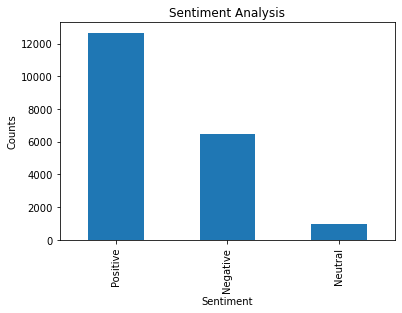

In [50]:
# Show the value counts

data['Analysis'].value_counts()

#Plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
data['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

In [51]:
data.groupby(["Analysis"])["Star_rating"].mean()

Analysis
Negative    1.667077
Neutral     2.054393
Positive    2.879159
Name: Star_rating, dtype: float64

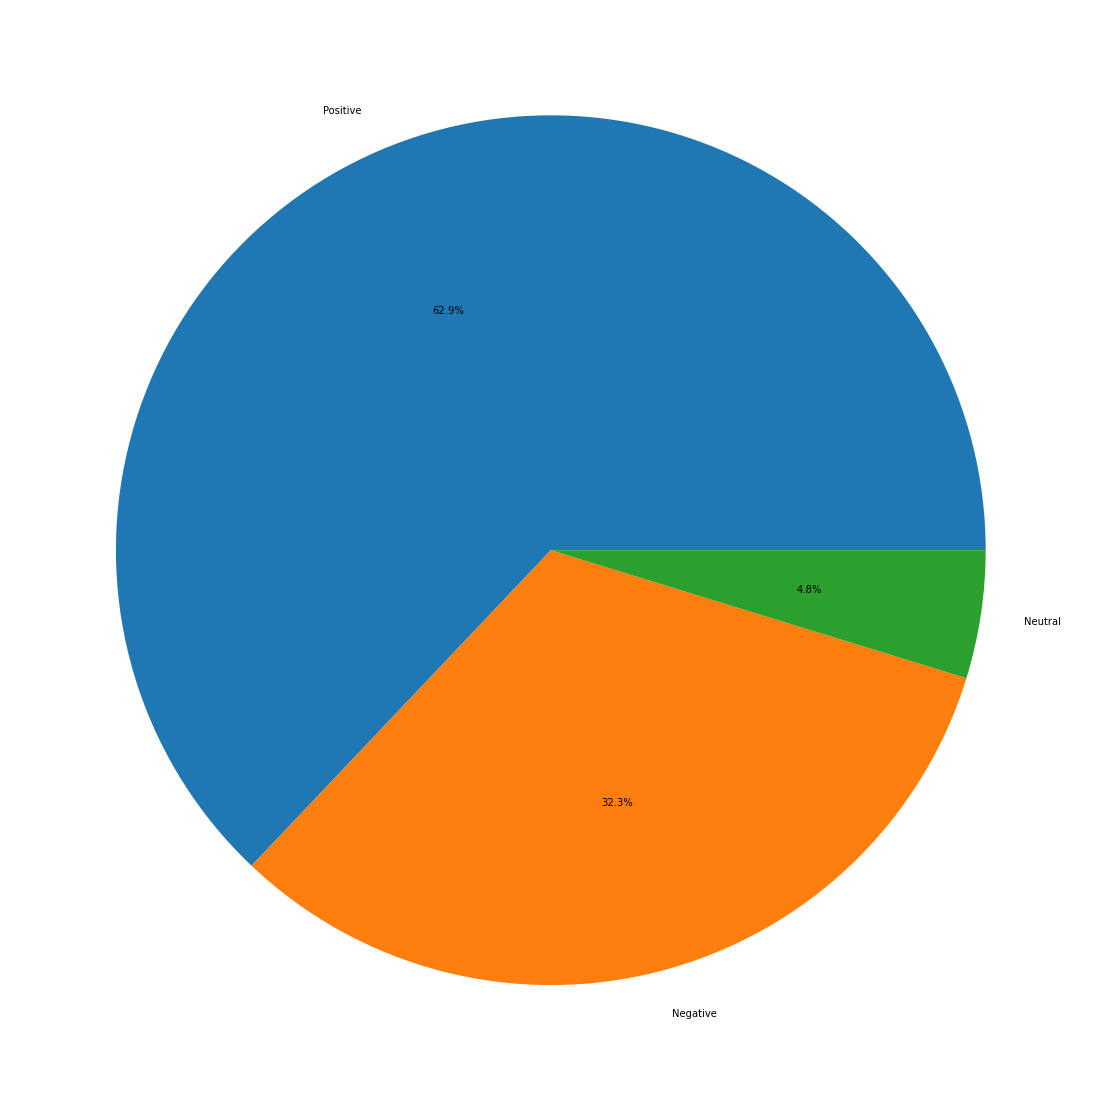

In [70]:
fig1,ax1 = plt.subplots(figsize = (20,20))
mylabels = data["Analysis"].value_counts().index
ax1.pie(data["Analysis"].value_counts(), labels=mylabels, autopct= '%1.1f%%')
plt.show()